In [25]:
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter

Theta = 250
N = 100
beta = 0.95
alpha = (1-beta)/2

def mean(x):
    return sum(x) / len(x);

def dover(x):
    n = len(x)
    xm = max(x)
    l = xm/(1+(1-alpha)**(1/n))
    r = xm/(1+(alpha)**(1/n))
    return (l,r)

def ass_dover_omm(x):
    n = len(x)
    alpha1 = mean(x)
    alpha2 = mean(x**2)
    te = alpha1*2/3
    l = te - 1.3*((alpha2-alpha1**2)/n)**0.5
    r = te + 1.3*((alpha2-alpha1**2)/n)**0.5
    return (l,r)

def bootstr_dover(x):
    n = len(x)
    te = max(x)/2
    delta = []
    for i in range(1000):
        delta.append(max([x[random.randint(0,n-1)] for i in range(n)])/2 - te)
    delta.sort()
    d_l = delta[int(alpha*1000)]
    d_r = delta[int((1-alpha)*1000)]
    l = te - d_r
    r = te - d_l
    return (l,r)


In [26]:
x = np.array([(random.uniform(Theta,2*Theta)) for i in range(N)])
inters = [dover(x),ass_dover_omm(x),bootstr_dover(x)]

In [27]:
print(x)
print()
for i in inters:
    print(i)

[382.45849277 311.69098973 370.92928803 434.16523656 376.88507798
 277.36319432 480.04488048 285.8620739  460.22315534 301.97813156
 267.65419588 456.86904981 496.23196054 289.09976853 292.69287633
 402.56118209 335.78550111 310.2138205  367.59407368 461.22057382
 383.00082227 283.16253538 263.95713232 405.47952543 260.28308115
 274.54625345 456.54298563 410.41051088 432.05903037 361.37172375
 479.68077857 294.21142992 324.69218153 475.52762105 342.19909716
 300.33917998 334.88690496 342.04482808 331.11154096 380.58252933
 462.6124597  327.19860736 453.64338547 472.08804511 402.50631955
 453.07175679 288.96115349 491.49530263 314.5275954  321.94608431
 328.46568448 295.50990061 363.57371519 298.04501106 256.63854209
 356.3926038  290.11630353 373.93394614 332.53791903 372.9859897
 283.07158021 469.37827461 403.31053226 366.5829028  270.01979852
 357.66992428 333.7700757  435.57777127 385.60256382 435.60287392
 256.32977452 323.91002802 310.23062231 394.53007808 279.78160055
 426.857754

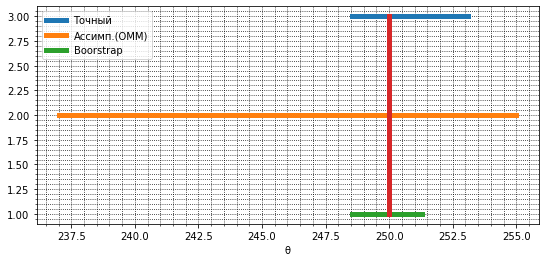

In [31]:
ys = (1,1)

fig, ax = plt.subplots(figsize=(9, 4))
labels = ["Точный","Ассимп.(ОММ)","Boorstrap"]
ax.minorticks_on()
ax.grid(which='major', color = 'k', linestyle = ':')
ax.grid(which='minor', color = 'k', linestyle = ':')
ax.set_xlabel('\u03B8')
k = len(inters)
for i in range(k):
    ax.plot(inters[i],(k-i,k-i),linewidth=5.0, label = labels[i])
ax.plot((Theta,Theta),(1,k),linewidth=5.0)
ax.legend()